# Exploratory Data Analysis Project

The aim of this project is to investigate and visualise data using various data science tools. In this project, we:
1. read data files in Python and extract related data from those files;
2. wrangle and process data;
3. use various graphical and non-graphical tools to perform exploratory data analysis and visualisation;
4. use basic tools for managing and processing big data; and
5. communicate findings.

#### Environment: Python 3 and Anaconda Jupyter Notebook 5.5.0 (64-bit) 


## Who are Data Scientists? Data Scientist Demographics

*'What does a does a Data Scientist look like?'*, *'What is Data Science exactly?'*, *'Is Python or R better to learn for beginners?'*, *'Do you have to have a degree in Computer Science to be a Data Scientist?'* and *'Do data scientists earn as much as I think?'*.

Anjul Bhambri, the Vice President of big data prodcts at IBM says this 

>*‘A data scientist is somebody who is inquisitive, who can stare at data and spot trends. It’s almost like a Renaissance individual who really wants to learn and bring change to an organisation.’*

The diversity in definitions, skill sets, tools, applications and knowledge domains that make data science are challenging to define precisely. By completing the following questions, we hope you can get a more precise understanding. 


**The Files**

- *multipleChoiceResponses.csv* : Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.
- *conversionRates.csv* : Currency conversion rates to USD.
- *nation.1751_2014* : CO2 Emissions for all countries from 1751 to 2014.

# Table of contents

* [0. Load data](#Load_data)
* [1. Demographic analysis](#demographics)
   * [1.1. Age](#age)
   * [1.2. Gender](#gender)
   * [1.3. Country](#country)
* [2. Education](#education)
    * [2.1. Formal education](#formal)
* [3. Employment](#employment)
    * [3.1. Employment Status](#status)
* [4. Salary](#salary)
    * [4.1. Salary overview](#overview)
    * [4.2. Salary by country](#countrysal)
    * [4.3. Salary and gender](#gender_salary)
    * [4.4. Salary and formal education](#education_salary)
    * [4.5. Salary and job](#salary_job)
* [5. Predicting Salary](#pred)


<a id="Load_data"></a>
## 0. Load libraries and files
***


In [1]:
# For reading csv files
import pandas as pd

# For plotting prediction graphs
import matplotlib.pyplot as pl

# For generating polynomial that fits a dataset
import numpy

# For creating boxplots, barplots and countplots
import seaborn as sns

# Reading survey responses file - multipleChoiceResponses.csv
responsesFrame = pd.read_csv('multipleChoiceResponses.csv',sep=',')

# Reading conversion rates file - conversionRates.csv
ratesFrame = pd.read_csv('conversionRates.csv',sep=',')

#### Let's look at the survey responses dataframe

In [2]:
responsesFrame.head()

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,CompensationAmount,CompensationCurrency,Unnamed: 10
0,Male,Argentina,26,Employed full-time,Business Analyst,SQL,Bachelor's degree,Other,18000.0,ARS,NaN
1,Male,Argentina,25,Employed full-time,Computer Scientist,Python,Bachelor's degree,Computer Science,24000.0,ARS,NaN
2,Male,Argentina,24,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,Computer Science,247000.0,ARS,NaN
3,Male,Argentina,25,Employed full-time,Machine Learning Engineer,Python,Bachelor's degree,"Information technology, networking, or system ...",546000.0,ARS,NaN
4,Female,Australia,37,Employed part-time,Data Analyst,SQL,Bachelor's degree,Other,55000.0,AUD,NaN


<a id="demographics"></a>
## 1. Demographic Analysis
***
##### So what does a data scientist look like?

Let's get a general understanding of the characteristics of the survey participants. Demographic overviews are a standard way to start an exploration of survey data. The types of participants can heavily affect the survey responses.

<a id="age"></a>
### 1.1 Age

Visualisation is a quick and easy way to gain an overview of the data. One method is through a boxplot. Boxplots are a way to show the distribution of numerical data and display the five descriptive statistics: minimum, first quartile, median, third quartile, and maximum. Outliers are also shown.

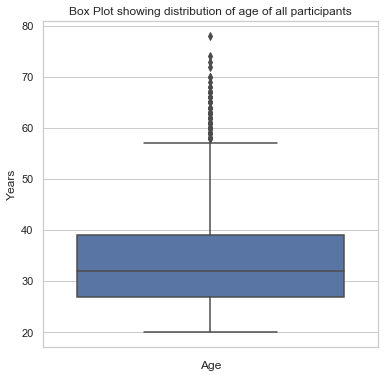

In [4]:
# Setting plot size
sns.set(rc={'figure.figsize':(6, 6)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(y = responsesFrame['Age'],
                 data = responsesFrame)

# Setting axes labels and title
ax.set(xlabel='Age', ylabel='Years', 
       title = 'Box Plot showing distribution of age of all participants')
ax

#### Stats
Let's calculate the five descriptive statistics as shown on the boxplot, as well as the mean.

In [5]:
# Getting all properties - mean, minimum, 
# first quartile, median, third quartile, maximum
stat = responsesFrame['Age'].describe()

# Mean
mean = int(round(stat['mean']))

# Minimum
minimum = int(round(stat['min']))

# first quartile
first = int(round(stat['25%']))

# median
median = int(round(stat['50%']))

# third quartile
third = int(round(stat['75%']))

# maximum
maximum = int(round(stat['max']))

# Printing everything
print('Minimum: ' + str(minimum))
print('First Quartile: ' + str(first))
print('Median: ' + str(median))
print('Third Quartile: ' + str(third))
print('Maximum: ' + str(maximum))
print('Mean: ' + str(mean))

Minimum: 20
First Quartile: 27
Median: 32
Third Quartile: 39
Maximum: 78
Mean: 34


<span style="color: green">**Observation**</span>
<p>50% of the participants are between the age of 27 (first quartile) and 39 (third quartile) with the median age of 32. Minimum age of the participants is 20 and maximum age of most of the participants is around 58. Though there are outliers with participant's age of upto 78.</p>

#### Number of Respondents under 18 and over 65

Let's find out the number of respondents under 18 and over 65.

In [6]:
# Your code

# Counting participants under 18 age
countAllUnder18 = len(responsesFrame[responsesFrame['Age'] < 18])

# Counting participants above 65 age
countAllOver65 = len(responsesFrame[responsesFrame['Age'] > 65])

# Counting participants under 18 age with Data Scientist job title
countUnder18 = len(responsesFrame[(responsesFrame['Age'] < 18)
               & 
               (responsesFrame['CurrentJobTitleSelect'] == 'Data Scientist')])

# Counting participants above 65 age with Data Scientist job title
countOver65 = len(responsesFrame[(responsesFrame['Age'] > 65)
              &
              (responsesFrame['CurrentJobTitleSelect'] == 'Data Scientist')])

# Printing everything
print('Number of participants under the age of 18: ' + str(countAllUnder18))
print('Number of participants over the age of 65: ' + str(countAllOver65))

print('Number of Data Scientists under the age of 18: ' + str(countUnder18))
print('Number of Data Scientists over the age of 65: ' + str(countOver65))

Number of participants under the age of 18: 0
Number of participants over the age of 65: 19
Number of Data Scientists under the age of 18: 0
Number of Data Scientists over the age of 65: 4


<a id="gender"></a>
### 1.2 Gender

We are interested in the gender of respondents. Within the STEM fields, there are more males than females or other genders. In 2016, the Office of the chief scientist found that women held only 25% of jobs in STEM. Let's see how data science compares.

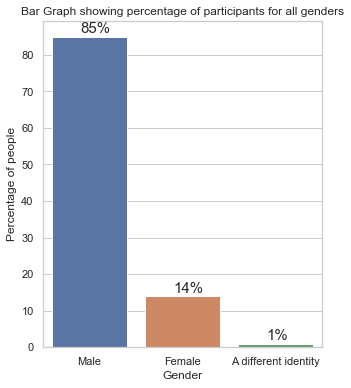

In [7]:
# Counting responses
total = len(responsesFrame)

# Getting male percentage
malePercent = len(responsesFrame
              [responsesFrame['GenderSelect'] == 'Male'])/total*100

# Getting female percentage
femalePercent = len(responsesFrame
                [responsesFrame['GenderSelect'] == 'Female'])/total*100

# Getting different identity percentage
otherPercent = len(responsesFrame[
               responsesFrame['GenderSelect']
               == 'A different identity'])/total*100

# Preparing a new dataframe
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'A different identity'],
    'Percent': [malePercent, femalePercent, otherPercent]
})

# Setting plot size
sns.set(rc={'figure.figsize':(5, 6)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating bar graph
ax = sns.barplot(x = df['Gender'], y = df['Percent'], data = df)

# Putting percentage values on the individual bars of the graph
for index, value in enumerate(df['Percent']):
    ax.text(index - 0.1, value + 1, 
            '{}%'.format(round(value)), fontsize = 15)

# Setting axes labels and title
ax.set(xlabel='Gender', ylabel='Percentage of people', 
       title = 'Bar Graph showing percentage of participants for all genders')
ax

<span style="color: green">**Observation**</span>

<br/>
Men percentage: 85%
<br/>
Women percentage: 14%


#### Relationship between age and gender
Let's see if there is any relationship between age and gender.

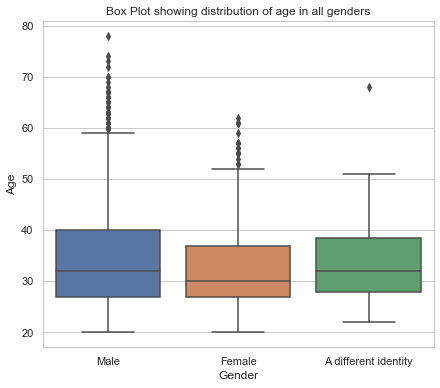

In [8]:
# Setting plot size
sns.set(rc={'figure.figsize':(7, 6)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(x = responsesFrame['GenderSelect'], 
                 y = responsesFrame['Age'], 
                 data = responsesFrame)

# Setting axes labels and title
ax.set(xlabel='Gender', ylabel='Age',
       title = 'Box Plot showing distribution of age in all genders')
ax

In [9]:
# Getting all properties - 
# mean, minimum, first quartile, median, 
# third quartile, maximum
maleStat = responsesFrame[
           responsesFrame['GenderSelect']
           == 'Male']['Age'].describe()

# Mean
mean = int(round(maleStat['mean']))

# Minimum
minimum = int(round(maleStat['min']))

# First quartile
first = int(round(maleStat['25%']))

# Median
median = int(round(maleStat['50%']))

# Third quartile
third = int(round(maleStat['75%']))

# Maximum
maximum = int(round(maleStat['max']))

# Printiing everything
print("Male statistics")
print('Minimum: ' + str(minimum))
print('First Quartile: ' + str(first))
print('Median: ' + str(median))
print('Third Quartile: ' + str(third))
print('Maximum: ' + str(maximum))
print('Mean: ' + str(mean))

# Getting all properties - 
# mean, minimum, first quartile, median,
# third quartile, maximum
femaleStat = responsesFrame[
             responsesFrame['GenderSelect'] 
             == 'Female']['Age'].describe()

# Mean
mean = int(round(femaleStat['mean']))

# Minimum
minimum = int(round(femaleStat['min']))

# First quartile
first = int(round(femaleStat['25%']))

# Median
median = int(round(femaleStat['50%']))

# Third quartile
third = int(round(femaleStat['75%']))

# Maximum
maximum = int(round(femaleStat['max']))

# Printing everything
print("\nFemale statistics")
print('Minimum: ' + str(minimum))
print('First Quartile: ' + str(first))
print('Median: ' + str(median))
print('Third Quartile: ' + str(third))
print('Maximum: ' + str(maximum))
print('Mean: ' + str(mean))

# Getting all properties - mean, minimum, first quartile, median, third quartile, maximum
otherStat = responsesFrame[
            responsesFrame['GenderSelect']
            == 'A different identity']['Age'].describe()

# Mean
mean = int(round(otherStat['mean']))

# Minimum
minimum = int(round(otherStat['min']))

# First quartile
first = int(round(otherStat['25%']))

# Median
median = int(round(otherStat['50%']))

# Third quartile
third = int(round(otherStat['75%']))

# Maximum
maximum = int(round(otherStat['max']))

# Printing everything
print("\nA different identity statistics")
print('Minimum: ' + str(minimum))
print('First Quartile: ' + str(first))
print('Median: ' + str(median))
print('Third Quartile: ' + str(third))
print('Maximum: ' + str(maximum))
print('Mean: ' + str(mean))

Male statistics
Minimum: 20
First Quartile: 27
Median: 32
Third Quartile: 40
Maximum: 78
Mean: 35

Female statistics
Minimum: 20
First Quartile: 27
Median: 30
Third Quartile: 37
Maximum: 62
Mean: 33

A different identity statistics
Minimum: 22
First Quartile: 28
Median: 32
Third Quartile: 38
Maximum: 68
Mean: 35


<span style="color: green">**Observation**</span>

<p>We see that around 50% of the participants are between the age of 27 and 40 in all genders. Minimum age of participants is also approximately same in all genders which is around 20. The maximum age of the majority of the participants in all genders is between 52 and 59. This leads us to the conclusion that gender doesn't have a significant co-relation with age of participants. However, using the outliers, we see that, over the age of 60, men are more likely to participate than other genders.</p>

<a id="country"></a>
### 1.3 Country

We know that people practise data science all over the world. The United States is thought of as a 'hub' of commercial data science as well as research followed by the United Kingdom and Germany. 

Because the field is evolving so quickly, it may be that these perceptions, formed in the late 2000s are now inaccurate. So let's find out where data scientists live.

Participants from top 5 countries
United States: 32%
India: 12%
United Kingdom: 4%
Germany: 4%
Brazil: 4%


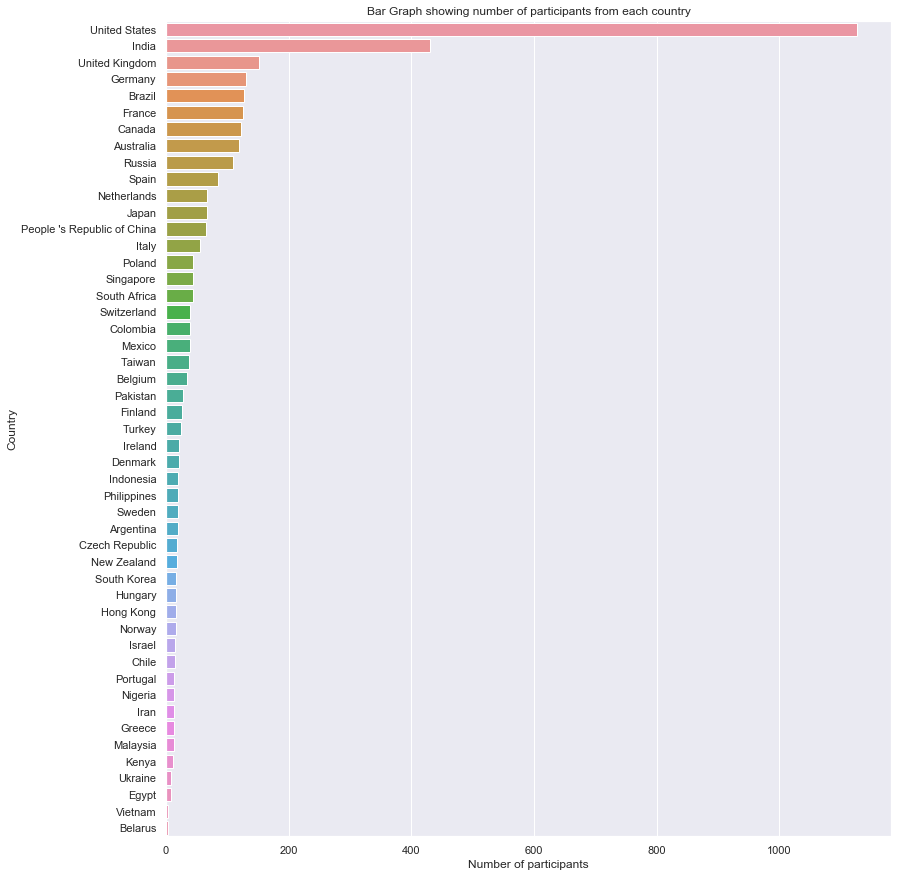

In [10]:
# Setting graph size
sns.set(rc={'figure.figsize':(13,15)})

# Creating count plot
ax = sns.countplot(y = responsesFrame['Country'], 
                   data = responsesFrame, 
                   order = responsesFrame['Country'].value_counts().index)

# Setting axes labels and title
ax.set(xlabel = 'Number of participants', 
       title = 'Bar Graph showing number of participants from each country')

# Counting all responses
total = len(responsesFrame)

# Counting all particpants from each country 
# and then taking top 5 and putting them in a dictionary
dictionary = responsesFrame['Country'].value_counts()[:5]

# Printing percentages of participants from top 5 countries
print('Participants from top 5 countries')
for country in dictionary.keys():
    print('{}: {}%'.format(country, 
                           int(round(dictionary[country]/total*100))))
    
ax

<span style="color: green">**Observation**</span>

<br/>
India has entered the data science realm and is the 2nd biggest nation in terms of number of respondents. But United States is still the hub of data science and is almost 3 times bigger than 2nd biggest nation - India. However, after India, UK and Germany follows as usual.

<p>Looking at the graph, we can say that over 50% of the participants are coming from either US, India, UK or Germany.</p>

#### Relationship between country, age and gender
Now that we have another demographic variable, let's see if there is any relationship between country, age and gender. We are specifically interested in the United States, India, United Kingdom, Germany and of course Australia!

In [11]:
# Creating a filter to filter responses from only 
# those participants that come from United States, 
# India, United Kingdom, Germany or Australia
filt = (responsesFrame['Country'] == 'United States') | (responsesFrame['Country'] == 'India') | (responsesFrame['Country'] == 'United Kingdom') | (responsesFrame['Country'] == 'Germany') | (responsesFrame['Country'] == 'Australia')

# Applying filter on the data
filtered = responsesFrame[filt]

# Setting all aggregate functions we need to apply
function = ['mean','median']

# Grouping the data by country and gender
# then applying aggregate functions
frame = filtered.groupby(['Country','GenderSelect'])['Age'].agg(function)

# Renaming columns
frame.rename(columns = {'mean':'Mean Age', 'median':'Median Age'}, 
             inplace = True)


frame = frame.reset_index()

frame

,Country,GenderSelect,Mean Age,Median Age
0,Australia,Female,35.000000,34
1,Australia,Male,37.158416,36
2,Germany,Female,31.428571,29
3,Germany,Male,36.629310,34
4,India,A different identity,22.000000,22
5,India,Female,29.061224,28
6,India,Male,29.553806,28
7,United Kingdom,A different identity,36.000000,36
8,United Kingdom,Female,33.636364,33
9,United Kingdom,Male,35.811024,33


<span style="color: green">**Observation**</span>

We see that, on average, female participants are slightly younger than male participants in each of these countries except UK and India where they are almost same age.


<a id="education"></a>
## 2. Education

***
So far we have seen the relationships between age, gender and the country that the respondents are from.  Next, we look at what their education is like. 

<a id="formal"></a>
### 2.1 Formal education

We find that a significant number of job advertisements call for a masters degree or a PhD. Let's see if this is a reasonable ask based on the respondent's formal education.

Bachelor's degree
Total Number: 930
Percentage: 26%

Doctoral degree
Total Number: 808
Percentage: 23%

Incomplete university studies
Total Number: 87
Percentage: 2%

Master's degree
Total Number: 1594
Percentage: 45%

No Formal education
Total Number: 25
Percentage: 1%

Professional degree
Total Number: 96
Percentage: 3%



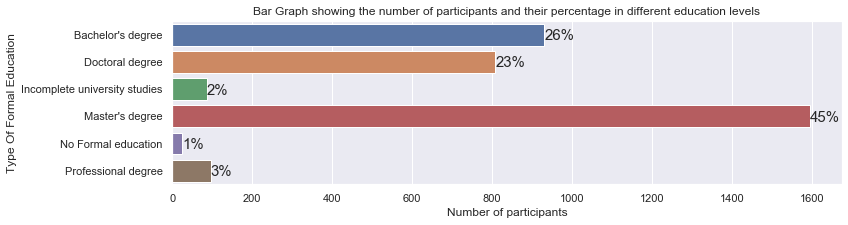

In [12]:
# Getting total number of respondents
total = len(responsesFrame)

# Counting the number of people in each education level 
# and saving into a dataframe
educationFrame = responsesFrame.groupby(['FormalEducation']).size().reset_index(name='Count')

# Setting the graph size
sns.set(rc={'figure.figsize':(12,3)})

# Making the bar graph
ax = sns.barplot(x = educationFrame['Count'], 
                 y = educationFrame['FormalEducation'], 
                 data = educationFrame)

# Setting axes labels
ax.set(xlabel = 'Number of participants', 
       ylabel = 'Type Of Formal Education', 
       title = 'Bar Graph showing the number of participants and their percentage in different education levels')

# Putting percentage values on the individual bars of the graph
for index, value in enumerate(educationFrame['Count']):
    ax.text(value, index + 0.2, '{}%'.format(round(value/total*100)), fontsize = 15)

# Printing number and percentage of respondents 
# with each type of formal education
for index, row in educationFrame.iterrows():
    print(row['FormalEducation'])
    print('Total Number: ' + str(row['Count']))
    print('Percentage: ' + str(round(row['Count']/total*100)) + '%\n')
    
ax

<span style="color: green">**Observation**</span>

Though Master's and Doctoral degree participants account for 68% of the whole population of participants, we see that Bachelor's degree folks account for 26%, which is a significant section and not a small percentage. Thus, if job advertisers will only look for Master's and Doctoral education level, they will be missing out on a huge chunk of Bachelor's degree holders which may be equally talented and worthy of their job.


#### Trend in Australia

Let's have a look at the education level of Australian participants.

Bachelor's degree
Total Number: 45
Percentage: 38%

Doctoral degree
Total Number: 25
Percentage: 21%

Incomplete university studies
Total Number: 5
Percentage: 4%

Master's degree
Total Number: 42
Percentage: 35%

Professional degree
Total Number: 2
Percentage: 2%



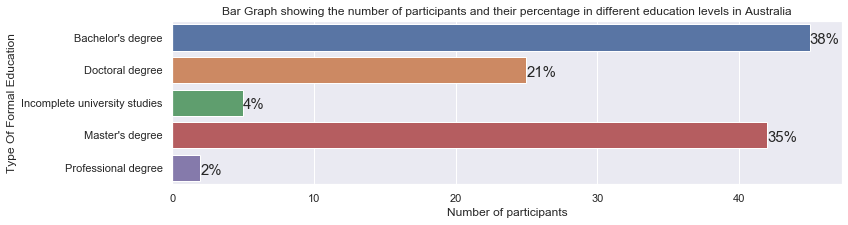

In [13]:
# Getting total number of respondents from Australia
total = len(responsesFrame[responsesFrame['Country'] == 'Australia'])

# Counting the number of people in each education level in Australia and saving into a dataframe
educationFrame = responsesFrame[responsesFrame['Country'] == 'Australia'].groupby(['FormalEducation']).size().reset_index(name='Count')

# Setting the graph size
sns.set(rc={'figure.figsize':(12,3)})

# Making the bar graph
ax = sns.barplot(x = educationFrame['Count'], 
                 y = educationFrame['FormalEducation'], 
                 data = educationFrame)

# Setting axes labels
ax.set(xlabel = 'Number of participants', 
       ylabel = 'Type Of Formal Education', 
       title = 'Bar Graph showing the number of participants and their percentage in different education levels in Australia')

# Putting percentage values on the individual bars of the graph
for index, value in enumerate(educationFrame['Count']):
    ax.text(value, index + 0.2, '{}%'.format(round(value/total*100)), fontsize = 15)

# Printing number and percentage of respondents with each type of formal education
for index, row in educationFrame.iterrows():
    print(row['FormalEducation'])
    print('Total Number: ' + str(row['Count']))
    print('Percentage: ' + str(round(row['Count']/total*100)) + '%\n')

ax

Mean and median age of respondants in each degree type:



In [14]:
# Setting the required functions
function = ['mean','median']

# Grouping by education and applying aggregate functions on Age
frame = filtered.groupby(['FormalEducation'])['Age'].agg(function)

# Renaming the mean and median columns
frame.rename(columns = {'mean':'Mean Age', 'median':'Median Age'},
             inplace = True)

# Resetting the indexes of the dataframe
frame = frame.reset_index()

# Iterating through each row in the dataframe and printing the required information
for index, row in frame.iterrows():
    print(row['FormalEducation'] + ":\nMean: " + str(round(row['Mean Age'])) + 
          " Median: " + str(round(row['Median Age'])) + "\n")

Bachelor's degree:
Mean: 31 Median: 28

Doctoral degree:
Mean: 39 Median: 36

Incomplete university studies:
Mean: 40 Median: 42

Master's degree:
Mean: 34 Median: 31

No Formal education:
Mean: 43 Median: 44

Professional degree:
Mean: 37 Median: 33



<a id="employment"></a>
## 3. Employment

***
The graduate employment four months after graduation in Australia is 69.5%. At Monash, it is 70.1%. This is for all Australian degrees. Let's have a look at the state of the employment market for the respondents. 

<a id="employment"></a>
### 3.1 Employment status

The type of employment will affect the salary of a worker. Those employed part-time will likely earn less than those who work full time. 

#### Type of employment

Plotting the type of employment the respondents have on a bar chart.



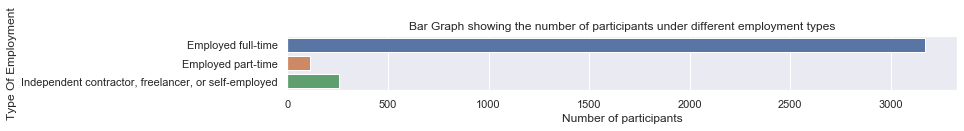

In [15]:
# Setting graph size
sns.set(rc={'figure.figsize':(12,1)})

# Creating count plot
ax = sns.countplot(y = responsesFrame['EmploymentStatus'], 
                   data = responsesFrame)

# Setting axes labels
ax.set(xlabel = 'Number of participants', 
       ylabel = 'Type Of Employment', 
       title = 'Bar Graph showing the number of participants under different employment types')
ax

#### Degrees and experience

We wonder if degree and experience will help gain full time employment after graduation. 

Plotting the respondants employment types against their degrees:

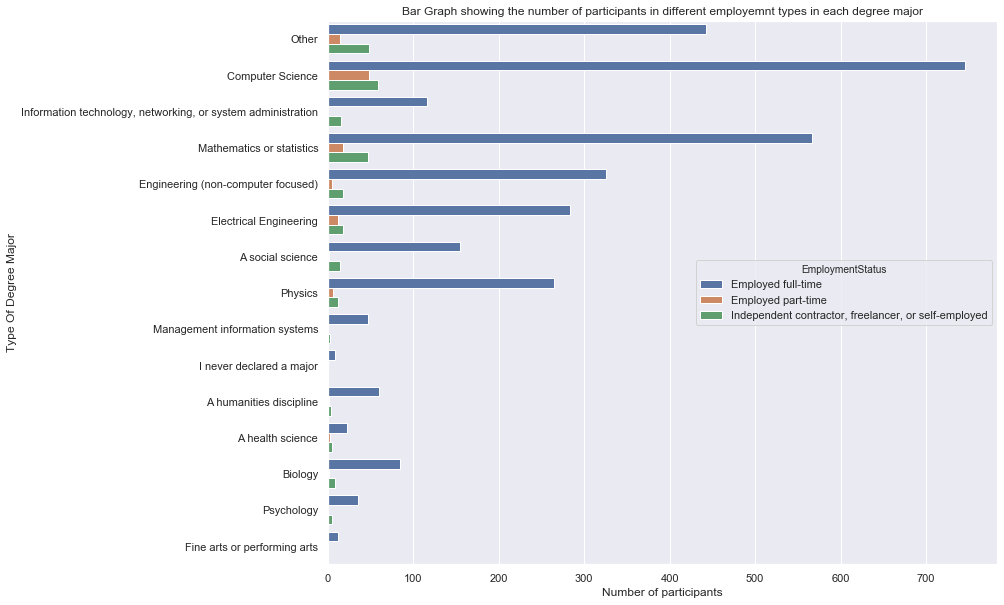

In [16]:
# Setting graph size
sns.set(rc={'figure.figsize':(12,10)})

# Creating count plot
ax = sns.countplot(y = responsesFrame['MajorSelect'], 
                   hue = responsesFrame['EmploymentStatus'], 
                   data = responsesFrame)

# Setting axes labels
ax.set(xlabel = 'Number of participants', 
       ylabel = 'Type Of Degree Major', 
       title = 'Bar Graph showing the number of participants in different employemnt types in each degree major')
ax

<span style="color: green">**Observation**</span>
<p>The best major to study is Computer Science for gaining full-time employment. There are very few full-time workers with major in IT, networking or system administration as compared to other related majors and no part-time workers at all.</p>

#### Employed full time in Australia, United Kingdom and the United States

Overall, we know that 92.71% of respondents are employed, and 89.55% are employed full time. This may not be the same for every country.

Let's print out the percentages of all respondents who are employed full time in Australia, United Kingdom and the United States.

In [17]:
# Creating a filter to filter those responses of the participants 
# that come from Australia, United Kingdom or the United States and 
# working part time or full time
filt = ((responsesFrame['Country'] == 'Australia') | (responsesFrame['Country'] == 'United Kingdom') | (responsesFrame['Country'] == 'United States')) & (responsesFrame['EmploymentStatus'] != 'Independent contractor, freelancer, or self-employed')

# Applying filter on the data
frame = responsesFrame[filt]

# Grouping all responses by country and keeping a count
frame1 = frame.groupby(['Country']).size().reset_index(name = 'Total Employed')

# Filtering again to get only full time employees' responses
fulltimeFrame = frame[frame['EmploymentStatus'] == 'Employed full-time']

# Grouping all responses by country and keeping a count
frame2 = fulltimeFrame.groupby(['Country']).size().reset_index(name = 'Full Time Employed')

# Merging the 2 dataframes on country
frame = pd.merge(frame1, frame2 , on=['Country'])
print("Percentages of all respondents who are employed full time in following countries:")

# Printing the percentages of all respondents 
# who are employed full time in each country
for index, row in frame.iterrows():
    print(row['Country'] + ": " + str(round(row['Full Time Employed']/row['Total Employed']*100, 2)) + '%')

Percentages of all respondents who are employed full time in following countries:
Australia: 96.19%
United Kingdom: 100.0%
United States: 97.72%


#### Median age of employees

Let's find out the median age of employees by type of employment using boxplots.

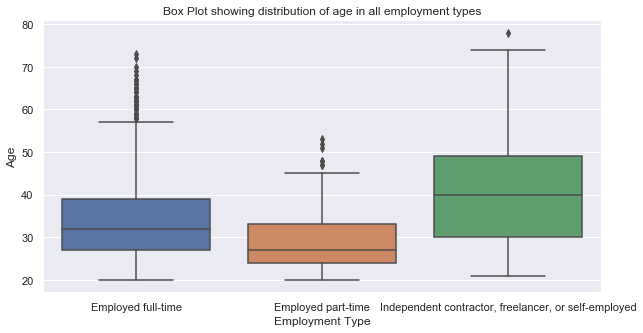

In [18]:
# Setting graph size
sns.set(rc={'figure.figsize':(10,5)})

# Creating box plot
ax = sns.boxplot(x = responsesFrame['EmploymentStatus'], 
                 y = responsesFrame['Age'], 
                 data = responsesFrame)

# Setting axes labels and title
ax.set(xlabel='Employment Type', 
       ylabel='Age', 
       title = 'Box Plot showing distribution of age in all employment types')
ax

Now this is interesting, full time employees seem to be a little older than part time employees. Independent contactors, freelancers and self-employed respondents are even more old. 

<a id="salary"></a>
## 4. Salary
***

Data science is considered a very well paying role and was named 'best job of the year' for 2016. 

We had a look around and saw that data scientists were paid between $110,823 at IBM and 149,963 at Apple, in Australian dollars. 

On average it seems that $116,840 is what an Australian Data scientist can expect to earn. Let's see if this is reasonable? Is this any different to the rest of the world?

<a id="overview"></a>
### 4.1 Salary overview

Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have exchange rates in a file called *conversionRates.csv*. 

Let's have a look at the data. 

In [3]:
ratesFrame.head()

,originCountry,exchangeRateUS,exchangeRateAUS,Rate
0,AED,0.272256,0.339340,1.246401
1,AFN,0.014570,0.018160,1.246401
2,ALL,0.008956,0.011163,1.246401
3,AMD,0.002090,0.002605,1.246401
4,ARS,0.058444,0.072845,1.246401


#### Median and max salaries of all respondents in AUD

Using the codes for each country, we merge the files so that we can convert the salary data to Australian Dollars (AUD). Let's print out the maximum and median salary in AUD.

In [20]:
# Your code

# Renaming columns so that column names match in both dataframes
ratesFrame.rename(columns = {'originCountry' : 'CompensationCurrency'}, inplace = True)

# Merge the 2 dataframes on CompensationCurrency column
mergeFrame = pd.merge(responsesFrame, ratesFrame, on = ['CompensationCurrency'])

# Renaming a column to use to store converted salary in AUD
mergeFrame.rename(columns = {'Unnamed: 10' : 'AUD Amount'}, inplace = True)

# Converting salary in AUD
mergeFrame['AUD Amount'] = mergeFrame['CompensationAmount'] * mergeFrame['exchangeRateAUS']

# Getting properties - maximum, median
stat = mergeFrame['AUD Amount'].describe()

# Printing maximum and median salary
print("Maximum Salary: AUD " + str(round(stat['max'])))
print("Median Salary: AUD " + str(round(stat['50%'])))

Maximum Salary: AUD 790290.0
Median Salary: AUD 76998.0


<span style="color: green">**Observation**</span>

We find that the figures written in the above section were exaggerated. The median salary is AUD 76,998 which is much less than the stated AUD 116,840.


<a id="countrysal"></a>
### 4.2 Salary by country

Since each country has different cost of living and pay indexes, we should see how they compare.

#### Australian respondents salary distribution
Plotting a boxplot for the Australian respondents salary distribution, and then printing out the maximum and median salaries for Australian repsondents.

Maximum Salary: AUD 500000.0
Median Salary: AUD 120000.0


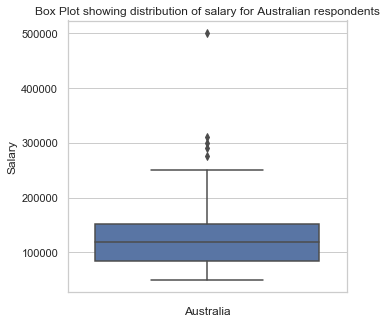

In [21]:
# Getting all Australia data and reusing the dataframe from above code block
frame = mergeFrame[mergeFrame['Country'] == 'Australia']

# Setting groph size
sns.set(rc={'figure.figsize':(5,5)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(y = frame['AUD Amount'], 
                 data = frame)

# Setting axes labels
ax.set(xlabel='Australia', 
       ylabel='Salary', 
       title = 'Box Plot showing distribution of salary for Australian respondents')
ax

# # Getting properties - maximum, median
stat = frame['AUD Amount'].describe()

# Printing maximum and median salary
print("Maximum Salary: AUD " + str(round(stat['max'])))
print("Median Salary: AUD " + str(round(stat['50%'])))

<span style="color: green">**Observation**</span>

<p>Now we find that we were wrong. The median salary of the Australian respondents (AUD 120,000) is very close to the one stated in the above section.</p>

#### Salaries in all countries

Plotting the salaries in all countries on a bar chart.

Note: Adjusting for full-time employees only

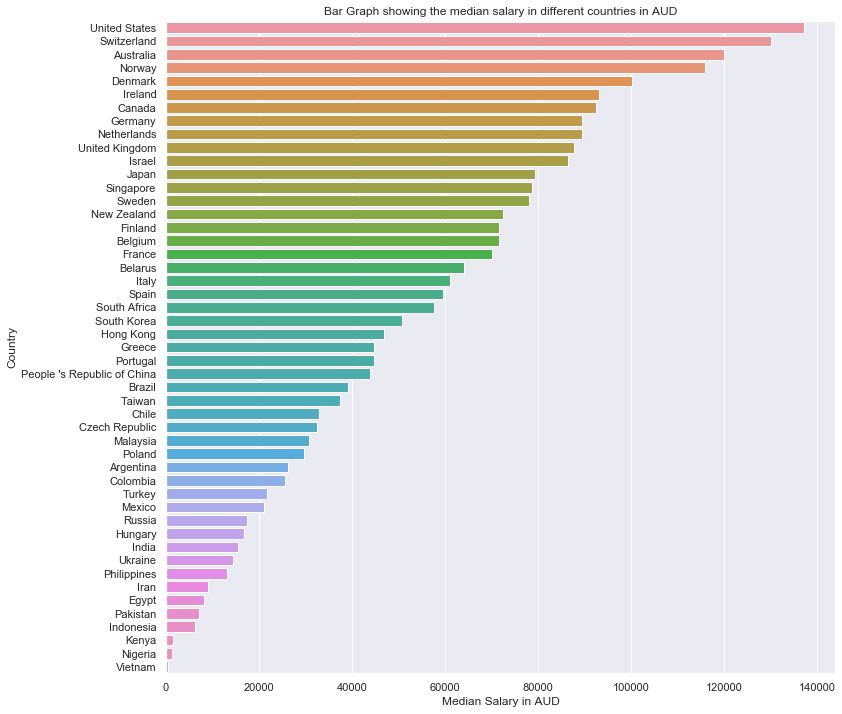

In [22]:
# Filtering responses to only full time employed respondents, grouping by country,
# applying aggregate function of median on AUD salaries, reseting index and
# sorting the median salaries in descending order
frame = mergeFrame[mergeFrame['EmploymentStatus'] == 'Employed full-time'].groupby(['Country'])['AUD Amount'].agg('median').reset_index(name = 'Median Salary in AUD').sort_values(by = 'Median Salary in AUD', ascending = False)

# Setting the graph size
sns.set(rc={'figure.figsize':(12,12)})

# Making the bar graph
ax = sns.barplot(x = frame['Median Salary in AUD'], 
                 y = frame['Country'], 
                 data = frame)

# Setting title
ax.set(title = 'Bar Graph showing the median salary in different countries in AUD')
ax

<span style="color: green">**Observation**</span>

We notice that developed nations where cost of living is too high, employees are paid high whereas nations where it is low, employees are paid low. This is reasonable from general perspective.



<a id="gender_salary"></a>
### 4.3 Salary and Gender

The gender pay gap in the tech industry is a big talking point. Let's see if the respondents show this effect.

#### Salaries grouped by gender


Plotting the salaries of all countries grouped by gender on a boxplot.


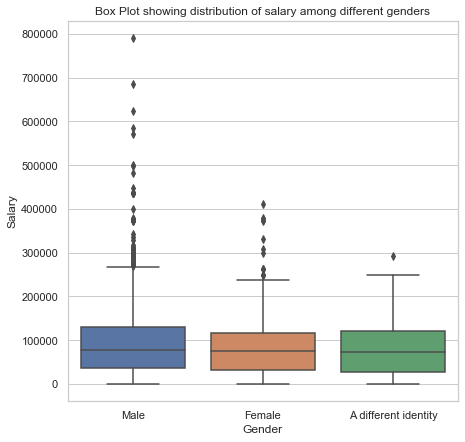

In [23]:
# Setting graph size
sns.set(rc={'figure.figsize':(7,7)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(x = mergeFrame['GenderSelect'], 
                 y = mergeFrame['AUD Amount'], 
                 data = mergeFrame)

# Setting axes labels and title
ax.set(xlabel='Gender', 
       ylabel='Salary', 
       title = 'Box Plot showing distribution of salary among different genders')
ax

<span style="color: green">**Observation**</span>
<p>We can see that there is a no huge pay gap between genders among majority of the respondents. However, if we look at the outliers separately, we notice an enormous pay gap between all genders.</p>

#### Salaries of Australia, United States and India grouped by gender
The salaries may be affected by the country the responant is from. In Australia the weekly difference in pay between men and women is 17.7% and in the United states it is 26%.

Printing the median salaries of Australia, United States and India grouped by gender.


In [24]:
# Creating a filter to filter the dataframe to participant's responses 
# who come from Australia, United States or India
filt = (mergeFrame['Country'] == 'Australia') | (mergeFrame['Country'] == 'United States') | (mergeFrame['Country'] == 'India')

# Applying the filter, grouping by country and gender, applying aggregate 
# function of median on AUD salary and reseting index
frame = mergeFrame[filt].groupby(['Country','GenderSelect'])['AUD Amount'].agg('median').reset_index(name = 'Median Salary in AUD')

# Transforming the dataframe
frame = frame.pivot('Country','GenderSelect','Median Salary in AUD')

# Printing all the data in the dataframe
for index, row in frame.iterrows():
    print('Median salaries in ' + index + ':')
    
    # Avoid printing the 'different identity' gender data 
    # where this gender doesn't exist in that country respondents
    if(repr(row['A different identity']) != 'nan'):
        print('A different identity: AUD ' + str(round(row['A different identity'])))
        
    # Avoid printing the 'female' gender data 
    # where this gender doesn't exist in that country respondents
    if(repr(row['Female']) != 'nan'):
        print('Female: AUD ' + str(round(row['Female'])))
        
    # Avoid printing the 'male' gender data 
    # where this gender doesn't exist in that country respondents
    if(repr(row['Male']) != 'nan'):
        print('Male: AUD ' + str(round(row['Male'])) + '\n')

Median salaries in Australia:
Female: AUD 82000.0
Male: AUD 130000.0

Median salaries in India:
A different identity: AUD 13628.0
Female: AUD 12655.0
Male: AUD 17327.0

Median salaries in United States:
A different identity: AUD 168264.0
Female: AUD 112176.0
Male: AUD 143336.0



<span style="color: green">**Observation**</span>
<p>We now see huge gaps between Male and Female salaries in all of these countries.

<a id="education_salary"></a>
### 4.4 Salary and formal education


*Is getting a master's really worth it?*
*Do PhDs get more money?*

Let's see.

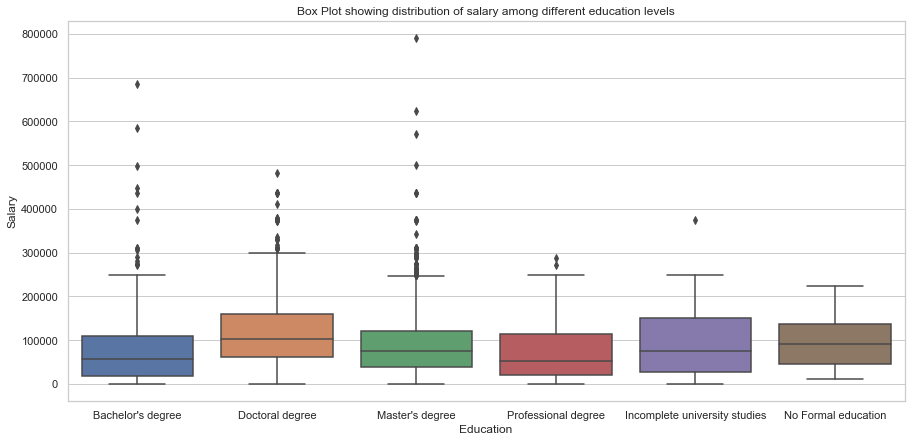

In [25]:
# Setting graph size
sns.set(rc={'figure.figsize':(15,7)})

# Setting the background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(x = mergeFrame['FormalEducation'], 
                 y = mergeFrame['AUD Amount'], 
                 data = mergeFrame)

# Setting axes labels and title
ax.set(xlabel='Education', 
       ylabel='Salary', 
       title = 'Box Plot showing distribution of salary among different education levels')
ax

<span style="color: green">**Observation**</span>
<p>It is definitely better to get a PhD than a Master's degree if one wants to secure a highly paying job because the first quartile, median, third quartile and maximum values are all higher in the Doctoral degree box plot than the one for Master's. And though the outliers in Master's degree box plot are higher than the Doctoral one, we can't rely on those few cases and must draw conclusion from what the larger group of data points say.</p>

<a id="salary_job"></a>
### 4.5 Salary and job

So are data scientists the highest paid in the industry?  Or are there lesser known roles that are hiding from the spotlight?

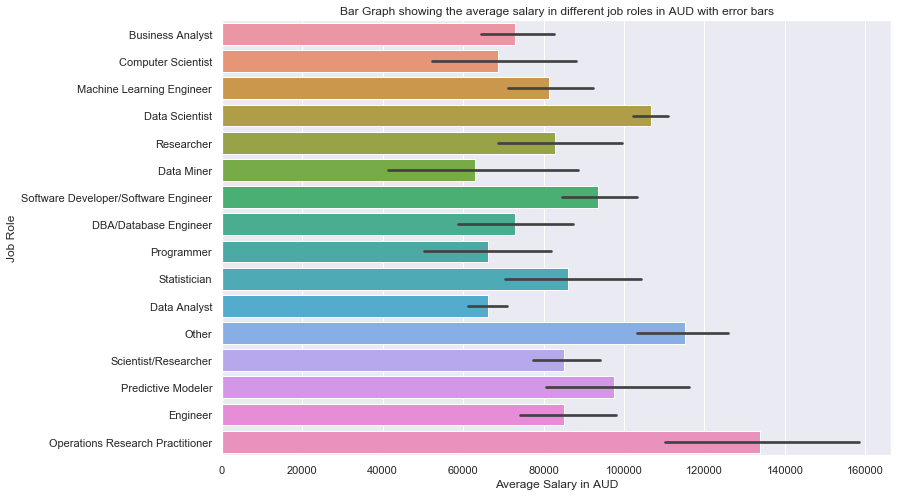

In [26]:
# Filtering data to only full-time employed respondents
frame = mergeFrame[mergeFrame['EmploymentStatus'] == 'Employed full-time']

# Setting the graph size
sns.set(rc = {'figure.figsize':(12,8)})

# Making the bar graph
ax = sns.barplot(x = frame['AUD Amount'], 
                 y = frame['CurrentJobTitleSelect'], 
                 data = frame)

# Setting axes labels and title
ax.set(xlabel = 'Average Salary in AUD', 
       ylabel = 'Job Role', 
       title = 'Bar Graph showing the average salary in different job roles in AUD with error bars')
ax

<span style="color: green">**Answer**</span>
<p>Clearly, Operations Research Practitioner earns the most as it has the widest bar in the bar graph above.</p>


#### So why are data scientists in the spotlight?

Plotting the salary distribution of full-time employees and group by job title as boxplots.

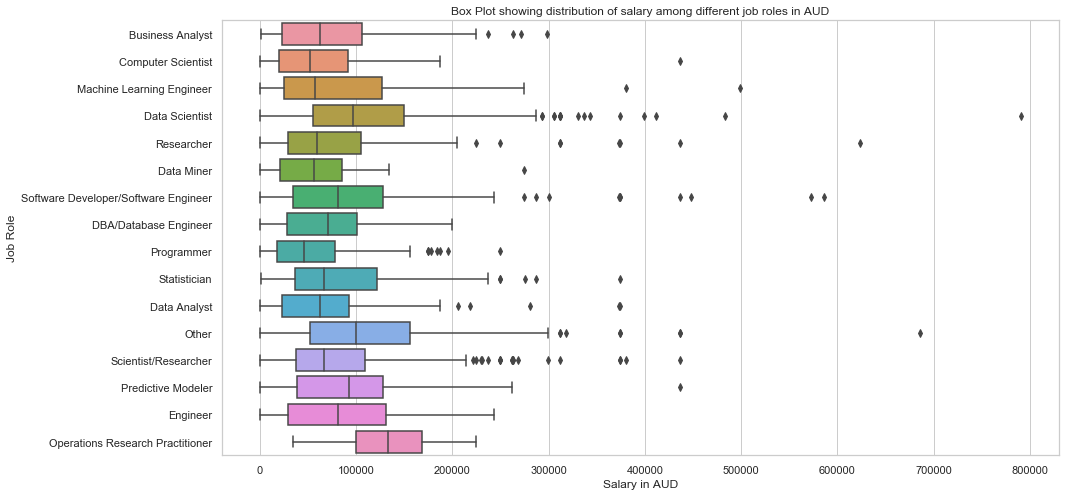

In [27]:
# Filtering data to only full-time employed respondents
frame = mergeFrame[mergeFrame['EmploymentStatus'] == 'Employed full-time']

# Setting graph size
sns.set(rc={'figure.figsize':(15,8)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating box plot
ax = sns.boxplot(x = frame['AUD Amount'], 
                 y = frame['CurrentJobTitleSelect'], 
                 data = frame)

# Setting axes labels and title
ax.set(xlabel='Salary in AUD', 
       ylabel='Job Role', 
       title = 'Box Plot showing distribution of salary among different job roles in AUD')
ax

<span style="color: green">**Observation**</span>

<p>While Operations Research practitioners have a highest median salary, the data scientists have the highest maximum salaries of around \$300k, which is far greater than maximum salaries of around $225k in the former role. This explains why Data Scientist is such a sought after job role.</p>


<a id="pred"></a>
## 5. Predicting salary
***

We have looked at many variables and seen that there are a lot of factors that could affect your salary.  

Let's say we wanted to reduce it though. One method we could use is a linear regression. This is a very basic model that can give us some insights. Note though, there are more robust ways to predict salary based on categorical variables. But since this project is more about exploratory data analysis, so we will just try the simple Linear Regression.

#### Salary distribution by age
Plotting the salary distribution and age of respondants on a scatterplot.

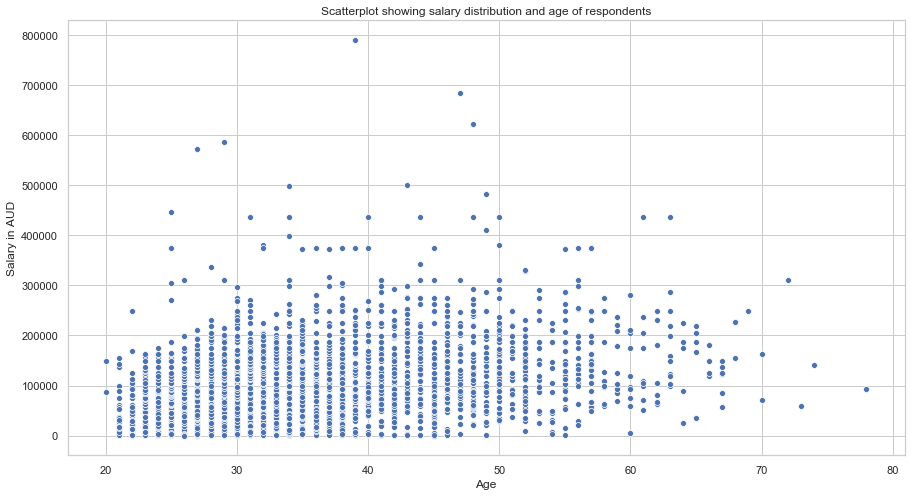

In [28]:
# Setting graph size
sns.set(rc={'figure.figsize':(15,8)})

# Setting background grid style
sns.set(style="whitegrid")

# Creating scatter plot
ax = sns.scatterplot(x = mergeFrame['Age'], 
                     y = mergeFrame['AUD Amount'], 
                     data = mergeFrame)

# Settin axes labels and title
ax.set(ylabel = 'Salary in AUD', 
       title = 'Scatterplot showing salary distribution and age of respondents')
ax

There is a weak relationship. Let's just go ahead with this.

Creating a linear regression between the salary and age of full-time Australian respondants and plotting the linear fit over the scatterplot.

Text(0.5, 0.98, 'A simple polynomial fit to the salary data of Australian respondents against age')

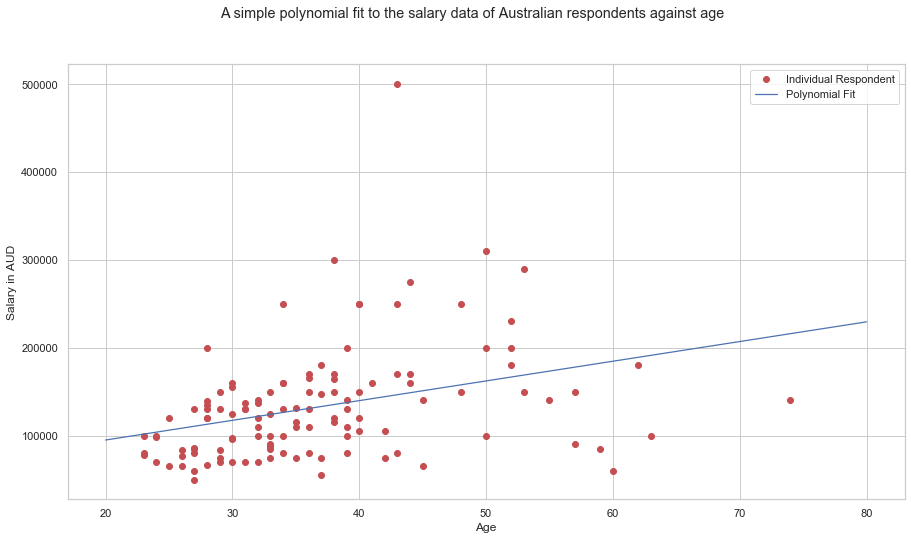

In [29]:
# Filtering data to only Australia
frame = mergeFrame[mergeFrame['Country'] == 'Australia']

# build the polynomial, a Python object from numpy
polynomial = numpy.poly1d(numpy.polyfit(frame['Age'], 
                                        frame['AUD Amount'], 
                                        1))

# build the fitted poly curve from the polynomial
xPoints = numpy.linspace(20, 80, 100)
yPoints = polynomial(xPoints)

# plot data 
pl.plot(frame['Age'], 
        frame['AUD Amount'], 
        'ro', 
        label = 'Individual Respondent') 

# Setting axes labels
pl.ylabel('Salary in AUD')
pl.xlabel('Age')

# plot fitted curve
pl.plot(xPoints, 
        yPoints, 
        label = 'Polynomial Fit', 
        linewidth = 1.25 )

# Create legend
pl.legend()
pl.suptitle('A simple polynomial fit to the salary data of Australian respondents against age')

<span style="color: green">**Observation**</span>
<p>This is not a very good way to predict salary. It may work for a certain range of age, but the salary may be dependent on other variables like education.</p>


For reassurance, the Graduate Careers Australia 2016 survey found the median salary for masters graduates in Computer Science and IT was $76,000.

# Exploratory Analysis on CO2 emissions data
***

We now have the CO2 emissions data for all countries. Emissions for each country are recorded on a per year basis. The data for most of the countries is available from 1750s or 1800s. The latest emission records are from 2014. It has more than 17000 rows. This data is available at https://cdiac.ess-dive.lbl.gov/trends/emis/tre_coun.html. Have a look at the data below.

In [31]:
# Reading data file
data = pd.read_csv('nation.1751_2014.csv',sep=',')
data.head(10)

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,"(Note: missing values denoted by ""."")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Tom Boden and Bob Andres (Oak Ridge Na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOI: 10.3334/CDIAC/00001_V2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1949.0,4.0,4,0,0,0.0,.,.,0.0
4,AFGHANISTAN,1950.0,23.0,6,18,0,0.0,0,0,0.0
5,AFGHANISTAN,1951.0,25.0,7,18,0,0.0,0,0,0.0
6,AFGHANISTAN,1952.0,25.0,9,17,0,0.0,0,0,0.0
7,AFGHANISTAN,1953.0,29.0,10,18,0,0.0,0,0,0.0
8,AFGHANISTAN,1954.0,29.0,12,18,0,0.0,0,0,0.0
9,AFGHANISTAN,1955.0,42.0,17,25,0,0.0,0,0,0.0


## Wrangling data
***
We are focussing on the total CO2 emissions and per capita CO2 emissions, so dropping other columns.

In [32]:
# We are focussing on the total CO2 emissions and per capita CO2 emissions, so dropping other columns
data = data.drop(['Emissions from solid fuel consumption', 'Emissions from liquid fuel consumption', 'Emissions from gas fuel consumption', 'Emissions from cement production', 'Emissions from gas flaring', 'Emissions from bunker fuels (not included in the totals)'], axis = 1)

# Converting values in thousand metric tons to million metric tons
data['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'] = data['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)']/1000

# Renaming columns
data.rename(columns = {'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)':'Total CO2 emissions (million metric tons of Carbon)'}, inplace = True)

# Dropping first 3 rows
data = data.drop([0,1,2], axis = 0)
data.head()

,Nation,Year,Total CO2 emissions (million metric tons of Carbon),Per capita CO2 emissions (metric tons of carbon)
3,AFGHANISTAN,1949.0,0.004,.
4,AFGHANISTAN,1950.0,0.023,0
5,AFGHANISTAN,1951.0,0.025,0
6,AFGHANISTAN,1952.0,0.025,0
7,AFGHANISTAN,1953.0,0.029,0


## Let's first look at Australia
***
Plotting total CO2 emissions from Australia over the years

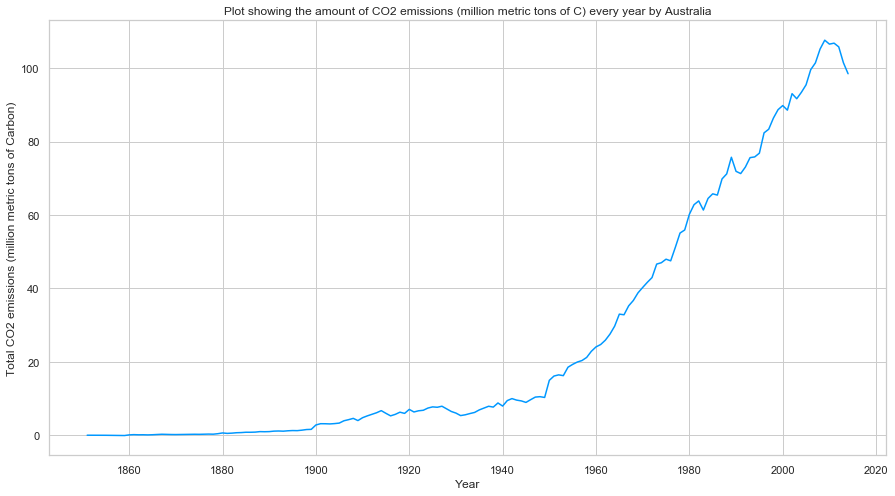

In [33]:
# Getting data from Australia only
ausData = data[data['Nation'] == 'AUSTRALIA']

# Setting some colors for graphs/plots
flatui = ["#0098ff", "#00c90a", "#c90000", "#000000", "#0800ff", "#cec700"]
sns.set_palette(flatui)

# Creating a line plot
ax = sns.lineplot(x = ausData['Year'], 
                  y = ausData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = ausData)

# Setting title
ax.set(title = 'Plot showing the amount of CO2 emissions (million metric tons of C) every year by Australia')

ax

<span style="color: green">**Observation**</span>

We see that around 1950s, CO2 emissions rapidly increased. This may be attributed to the increase in use of vehicles that started around that time. Vehicles burnt fossil fuels and led to the increased CO2 levels.

## Comparing Australia with other major contributers
***
Let's compare Australia with other major contributors of CO2 emissions. Let's plot the data for United States Of America, India, China and former USSR/Soviet Union (currently Russia, Ukraine, Turkmenistan, Uzbekistan, Kazakhstan and 10 other smaller countries).

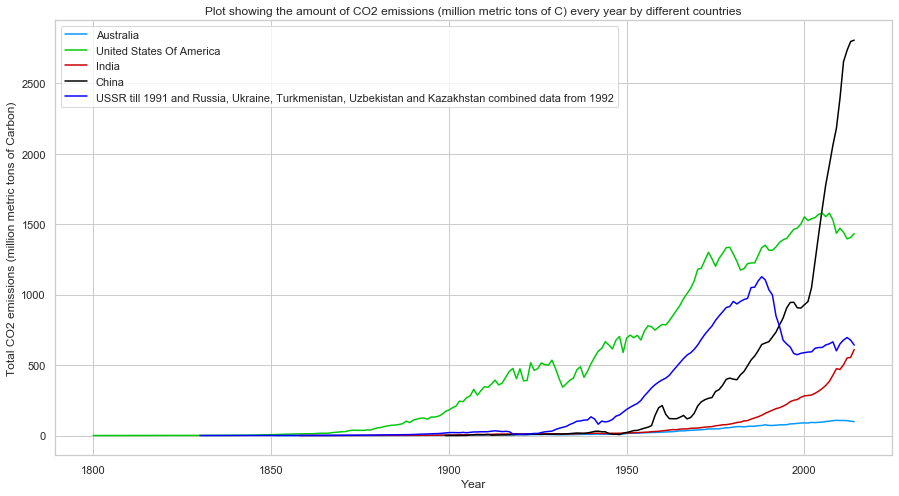

In [34]:
# Getting US data
usData = data[data['Nation'] == 'UNITED STATES OF AMERICA']

# Getting India data
indiaData = data[data['Nation'] == 'INDIA']

# Getting China data
chinaData = data[data['Nation'] == 'CHINA (MAINLAND)']

# Getting USSR (Soviet Union) Data from 1830 until it divided in 1991
ussrData = data[data['Nation'] == 'USSR']

# Getting the data from major countries that were part of USSR (Soviet Union)
# and didn't exist until 1991. These countries' data start from 1992.

# Ukraine data
ukraineData = data[data['Nation'] == 'UKRAINE'].reset_index(drop = True)

# Russia data
russiaData = data[data['Nation'] == 'RUSSIAN FEDERATION'].reset_index(drop = True)

# Turkmenistan data
turkmenistanData = data[data['Nation'] == 'TURKMENISTAN'].reset_index(drop = True)

# Uzbekistan data
uzbekistanData = data[data['Nation'] == 'UZBEKISTAN'].reset_index(drop = True)

# Kazakhstan data
kazakhstanData = data[data['Nation'] == 'KAZAKHSTAN'].reset_index(drop = True)

# Combining USSR (Soviet Union) data with UKRAINE's, RUSSIA's, 
# TURKMENISTAN's, UZBEKISTAN's and KAZAKHSTAN's data because these 
# countries almost form the shape of earlier USSR (Soviet Union).
# Let's ignore other 10 smaller countries.
# Then we will plot one line graph for all these countries.
combinedData = ukraineData

# Combining country names (not necessary)
combinedData['Nation'] = ukraineData['Nation'] + '-' + russiaData['Nation'] + '-' + turkmenistanData['Nation'] + '-' + uzbekistanData['Nation'] + '-' + kazakhstanData['Nation']

# Adding the CO2 emissions of all these countries
combinedData['Total CO2 emissions (million metric tons of Carbon)'] = ukraineData['Total CO2 emissions (million metric tons of Carbon)'] + russiaData['Total CO2 emissions (million metric tons of Carbon)'] + turkmenistanData['Total CO2 emissions (million metric tons of Carbon)'] + uzbekistanData['Total CO2 emissions (million metric tons of Carbon)'] + kazakhstanData['Total CO2 emissions (million metric tons of Carbon)']

# Taking average of per capita emissions for all these countries
combinedData['Per capita CO2 emissions (metric tons of carbon)'] = (ukraineData['Per capita CO2 emissions (metric tons of carbon)'].astype(float) + russiaData['Per capita CO2 emissions (metric tons of carbon)'].astype(float) + turkmenistanData['Per capita CO2 emissions (metric tons of carbon)'].astype(float) + uzbekistanData['Per capita CO2 emissions (metric tons of carbon)'].astype(float) + kazakhstanData['Per capita CO2 emissions (metric tons of carbon)'].astype(float))/5

# Combining this data with the USSR data so that we have data 
# from 1830 to 2014 from almost the same part of land
ussrCombinedData = ussrData.append(combinedData, ignore_index = True)

# Creating line plot of Australia
ax = sns.lineplot(x = ausData['Year'], 
                  y = ausData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = ausData, 
                  label = 'Australia')

# Creating line plot of United States Of America
ax = sns.lineplot(x = usData['Year'], 
                  y = usData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = usData, 
                  label = 'United States Of America')

# Creating line plot of India
ax = sns.lineplot(x = indiaData['Year'], 
                  y = indiaData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = indiaData, 
                  label = 'India')

# Creating line plot of China
ax = sns.lineplot(x = chinaData['Year'], 
                  y = chinaData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = chinaData, 
                  label = 'China')

# Creating line plot of USSR combined data
ax = sns.lineplot(x = ussrCombinedData['Year'], 
                  y = ussrCombinedData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = ussrCombinedData, 
                  label = 'USSR till 1991 and Russia, Ukraine, Turkmenistan, Uzbekistan and Kazakhstan combined data from 1992')

# Setting title
ax.set(title = 'Plot showing the amount of CO2 emissions (million metric tons of C) every year by different countries')
ax

<span style="color: green">**Observation**</span>

In this graph, we notice that Australian CO2 emissions are nothing compared to the emissions from China and United States. China's emissions are highest and almost double the second highest emissions contributor - United States. We see an almost vertical increase in emissions in China post 2000. We also notice that USSR (Soviet Union) emissions dropped around 1990s which may be the result of dissolution of the Soviet Union into 15 countries. This may have impacted the industries, businesses and general economy resulting in lower CO2 emissions. CO2 emissions in India have increased too albeit slowly in comparison with other countries.

## Comparing Australia with other similar CO2 contributers
***

Now let's compare Australia with other similar performing countries.

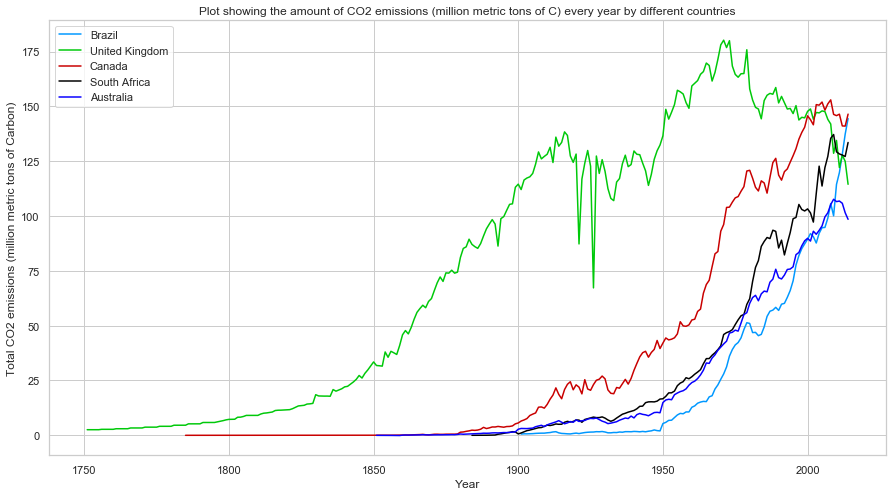

In [35]:
# Getting Brazil data
brazilData = data[data['Nation'] == 'BRAZIL']

# Getting UK data
ukData = data[data['Nation'] == 'UNITED KINGDOM']

# Getting Canada data
canadaData = data[data['Nation'] == 'CANADA']

# Getting South Africa data
saData = data[data['Nation'] == 'SOUTH AFRICA']

# Creating line plot of Brazil
ax = sns.lineplot(x = brazilData['Year'], 
                  y = brazilData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = brazilData, 
                  label = 'Brazil')

# Creating line plot of United Kingdom
ax = sns.lineplot(x = ukData['Year'], 
                  y = ukData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = ukData, 
                  label = 'United Kingdom')

# Creating line plot of Canada
ax = sns.lineplot(x = canadaData['Year'], 
                  y = canadaData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = canadaData, 
                  label = 'Canada')

# Creating line plot of South Africa
ax = sns.lineplot(x = saData['Year'], 
                  y = saData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = saData, 
                  label = 'South Africa')

# Creating line plot of Australia
ax = sns.lineplot(x = ausData['Year'], 
                  y = ausData['Total CO2 emissions (million metric tons of Carbon)'], 
                  data = ausData, 
                  label = 'Australia')

# Setting title
ax.set(title = 'Plot showing the amount of CO2 emissions (million metric tons of C) every year by different countries')
ax

<span style="color: green">**Observation**</span>

It seems that UK is 100 years ahead of other countries in CO2 emissions. We see that UK was already gaining the emission levels that other countries gained almost 100 years after. However, since 1970-80s, UK's emissions has dropped significantly and UK has joined the league of the other 4 countries coming towards 2014. We see that Brazil, Australia and South Africa performed almost same while Canada's emissions were always higher than these 3 countries.

## Let's look at 2014 data
***

Plotting emissions of only those countries that emitted 50 Million metric tons of carbon or greater in 2014

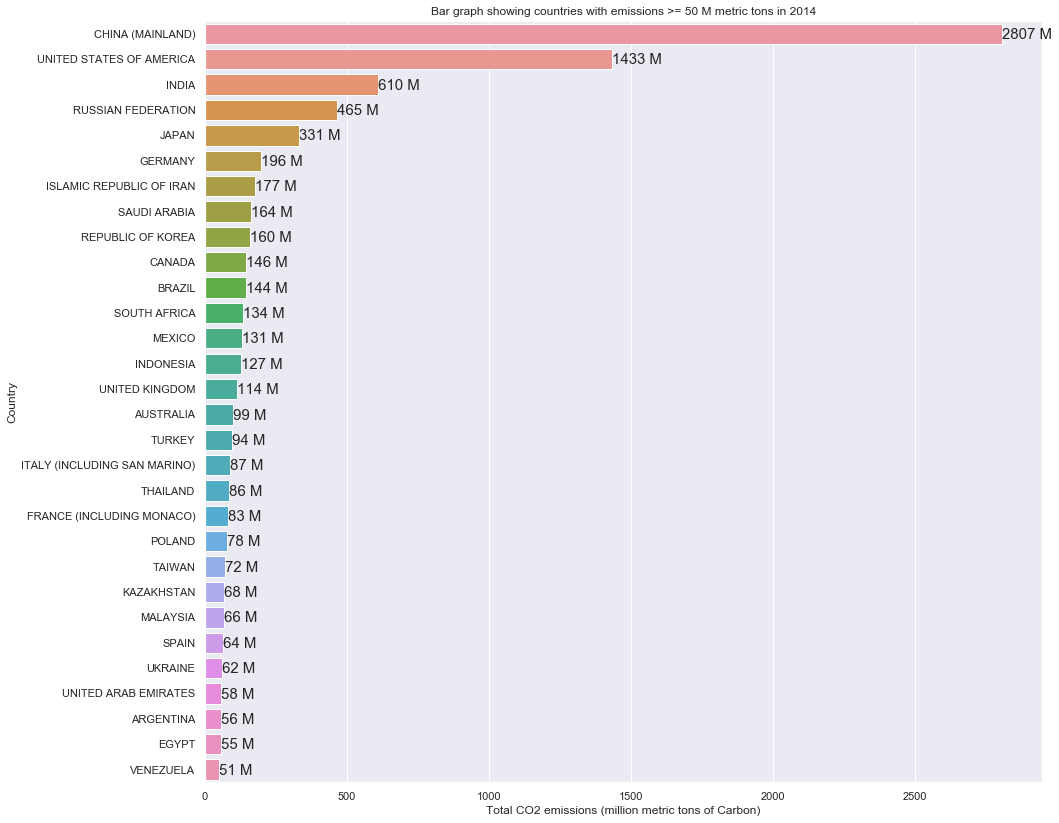

In [36]:
# Getting data of only those countries that emitted 
# 50 Million metric tons of carbon or greater in 2014
# and sorting them according to their emission levels in descending order
latest = data[(data['Year'] == 2014) & (data['Total CO2 emissions (million metric tons of Carbon)'] >= 50)].sort_values(by = 'Total CO2 emissions (million metric tons of Carbon)', ascending = False)

# Setting graph size
sns.set(rc={'figure.figsize':(15,14)})

# Creating the bar plot
ax = sns.barplot(x = 'Total CO2 emissions (million metric tons of Carbon)', 
                 y = 'Nation', 
                 data = latest)

# Setting the axes labels and title
ax.set(ylabel = 'Country', 
       title = 'Bar graph showing countries with emissions >= 50 M metric tons in 2014')

# Displaying emission figures corresponding to each bar on the plot
for index, value in enumerate(latest['Total CO2 emissions (million metric tons of Carbon)']):
    ax.text(value, index + 0.2, '{} M'.format(round(value)), fontsize = 15)
ax

<span style="color: green">**Observation**</span>

Here we see that the top 5 contributors of CO2 emissions in 2014 were China, United States, India, Russia and Japan. UK and Australia are at 15th and 16th position respectively. China's emissions are approximately double the emissions of United States whose emissions are also approximately double the emissions of India.

## Per capita emissions for the year 2014
***
Let's have a look at the per capita CO2 emissions of each country for the year 2014. Also, for the sake of clarity, let's ignore the ones that have 2 metric tons CO2 emissions or less.

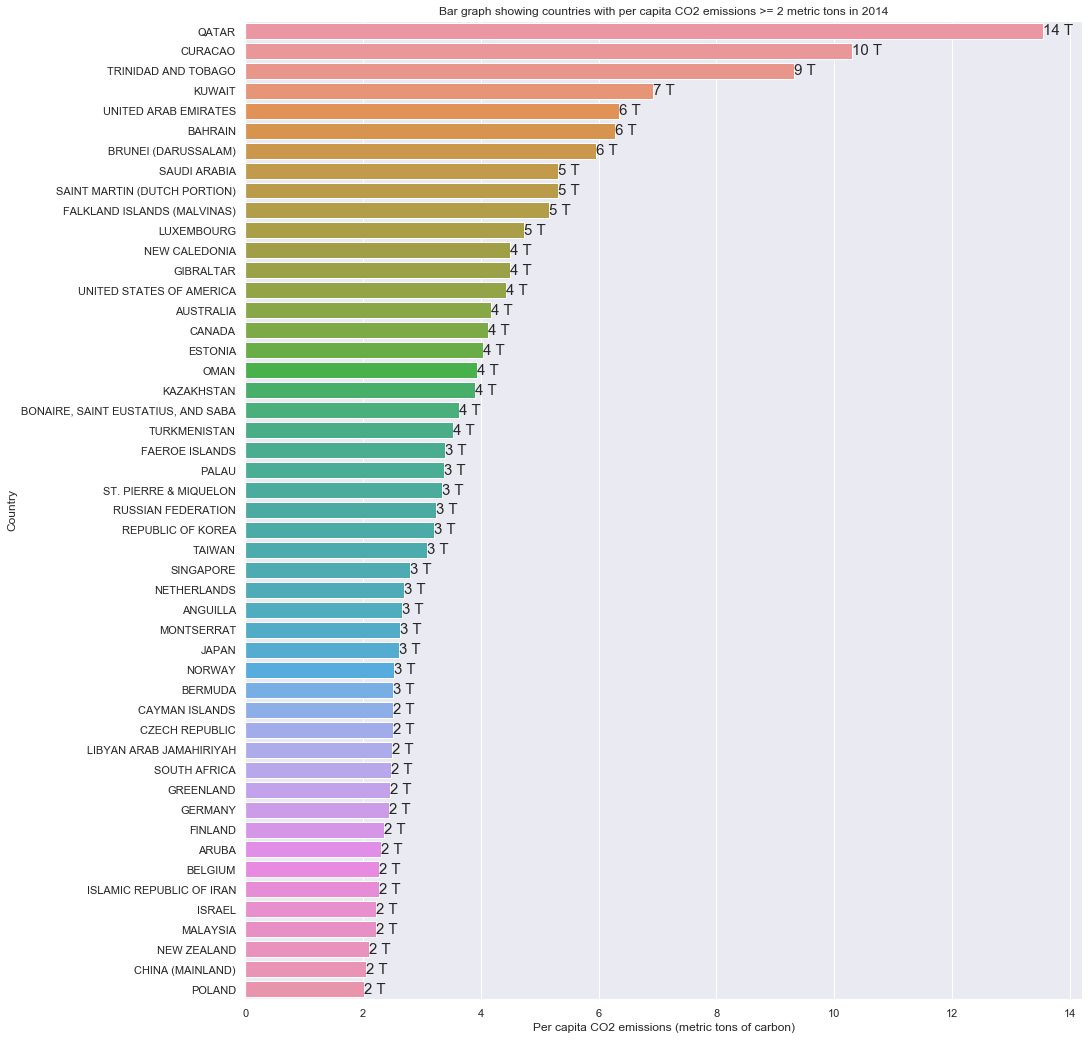

In [37]:
# Getting only the 2014 data
latest = data[data['Year'] == 2014].reset_index(drop = True)

# Creating an empty list for storing float type values of per capita CO2 emissions
values = []

# Creating an empty list for storing string type values of country names
countries = []

# Iterating over each row in the 2014 data
for index, row in latest.iterrows():
    
    # Avoiding the case where the data is not available
    if(row['Per capita CO2 emissions (metric tons of carbon)'] != '.'):
        
        # Only storing the data of those countries 
        # where per capita emissions exceed 2 tons
        if(float(row['Per capita CO2 emissions (metric tons of carbon)']) > 2):
            
            # Append data to both lists
            values.append(float(row['Per capita CO2 emissions (metric tons of carbon)']))
            countries.append(row['Nation'])

# Creating a new dataframe and saving the relevant information in it
newFrame = pd.DataFrame({
    'Country':countries,
    'Per capita CO2 emissions (metric tons of carbon)':values
})

# Sorting the countries according to their per capita emissions in descending order
newFrame = newFrame.sort_values(by = 'Per capita CO2 emissions (metric tons of carbon)', 
                                ascending = False)

# Setting the graph size
sns.set(rc={'figure.figsize':(15,18)})

# Creating the bar plot
ax = sns.barplot(x = newFrame['Per capita CO2 emissions (metric tons of carbon)'], 
                 y = newFrame['Country'], 
                 data = newFrame)

# Setting the axes labels and title
ax.set(ylabel = 'Country', 
       title = 'Bar graph showing countries with per capita CO2 emissions >= 2 metric tons in 2014')

# Displaying per capita emission figures in tons corresponding to each bar in the plot
for index, value in enumerate(newFrame['Per capita CO2 emissions (metric tons of carbon)']):
    ax.text(value, index + 0.2, '{} T'.format(round(value)), fontsize = 15)
ax

<span style="color: green">**Observation**</span>

We see that the top spots have been occupied by smaller countries like Qatar, Kuwait, United Arab Emirates, Bahrain and Saudi Arabia, all of which belong to the Middle East region. We can attribute this finding to the number of oil industries that operate in this region and which may be responsible for huge amounts of CO2 emissions. Talking about China, we can say that even when China is the largest contributor towards CO2 emissions, its huge population makes its per capita emission drop very low and thus it can be seen near the bottom of the graph.

## Predicting future CO2 emissions of Australia
***
Let's try to predict the CO2 emissions trend in Australia and check what levels it will reach around 2050.

(-5, 200)

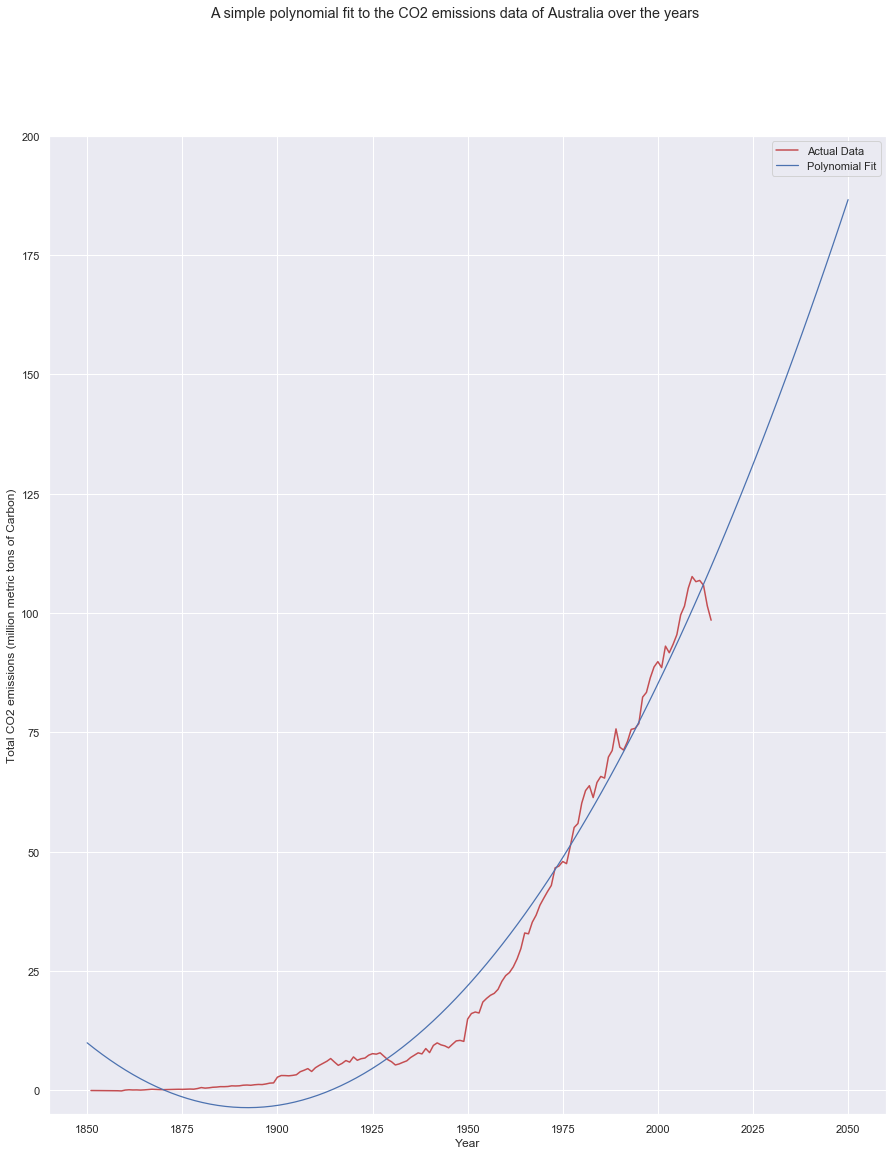

In [38]:
# Sitting polynomial order to 2
order = 2

# build the polynomial, a Python object from numpy
polynomial = numpy.poly1d(numpy.polyfit(ausData['Year'], 
                                        ausData['Total CO2 emissions (million metric tons of Carbon)'], 
                                        order))

# build the fitted poly curve from the polynomial
xPoints = numpy.linspace(1850, 2050, 100)
yPoints = polynomial(xPoints)

# plot data 
pl.plot(ausData['Year'], 
        ausData['Total CO2 emissions (million metric tons of Carbon)'], 
        'r-', 
        label = 'Actual Data') 

# Setting lables
pl.ylabel('Total CO2 emissions (million metric tons of Carbon)')
pl.xlabel('Year')

#  plot fitted curve
pl.plot(xPoints, 
        yPoints, 
        label = 'Polynomial Fit', 
        linewidth = 1.25 )

# Getting legend
pl.legend()

# Setting title
pl.suptitle('A simple polynomial fit to the CO2 emissions data of Australia over the years')

# Limiting y coordinates
pl.ylim(-5, 200)

<span style="color: green">**Observation**</span>

Upon fitting a 2nd order curve to the data, we see that the CO2 emissions level would double by the year 2050 in Australia.

## Predicting future CO2 emissions of China
***
Let's try to predict the CO2 emissions trend in China (since China is the biggest contributor) and check what levels it will reach around 2050.

(-100, 10000)

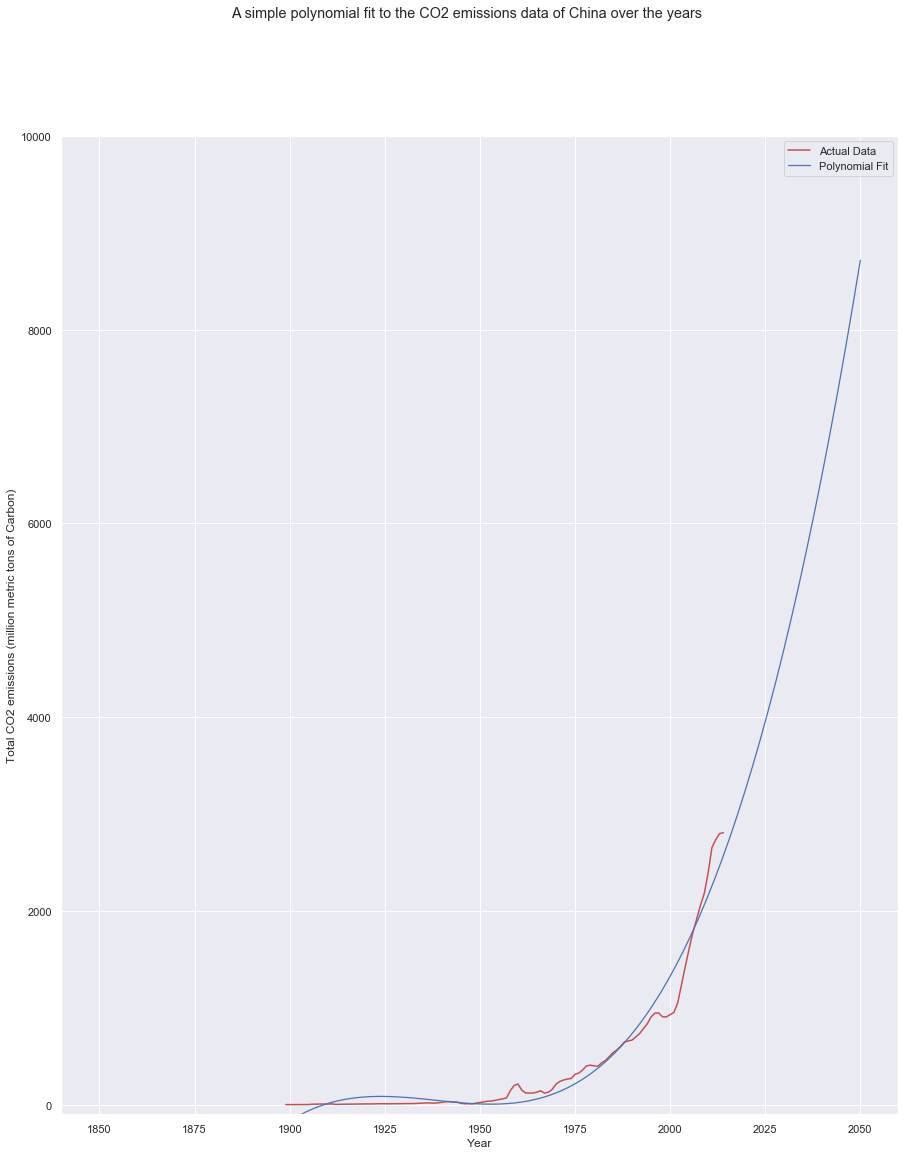

In [39]:
# Sitting polynomial order to 3
order = 3

# build the polynomial, a Python object from numpy
polynomial = numpy.poly1d(numpy.polyfit(chinaData['Year'], 
                                        chinaData['Total CO2 emissions (million metric tons of Carbon)'], 
                                        order))

# build the fitted poly curve from the polynomial
xPoints = numpy.linspace(1850, 2050, 100)
yPoints = polynomial(xPoints)

# plot data 
pl.plot(chinaData['Year'], 
        chinaData['Total CO2 emissions (million metric tons of Carbon)'], 
        'r-', 
        label = 'Actual Data') 

# Setting axes labels
pl.ylabel('Total CO2 emissions (million metric tons of Carbon)')
pl.xlabel('Year')

#  plot fitted curve
pl.plot(xPoints, 
        yPoints, 
        label = 'Polynomial Fit', 
        linewidth = 1.25 )

# Creating legend
pl.legend()

# Setting title
pl.suptitle('A simple polynomial fit to the CO2 emissions data of China over the years')

# Limiting y coordinates
pl.ylim(-100, 10000)

<span style="color: green">**Observation**</span>

Upon fitting a 3rd order curve to the data, we see that the CO2 emissions level would triple by the year 2050 in China.